##  Stock Prediction using LSTM Recurrent Neural Network

LSTM (long short-term memory)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout  

Using TensorFlow backend.


In [2]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")          # download the dataset from google
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
# taking 'Open' column only to create RNN which should be able to predict what is the open future prediction 

training_set = dataset_train.iloc[:, 1:2]     # 'Open' column 

In [7]:
# Now feature Scaling (scale down b/w 0 and 1)

from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)    

In [8]:
# Creating a Datastructure with 60 timestamps and 1 output   
# based on 60 timestamps(t1,t2....t60) we predict output for-> 61 timestamp 
# then we start from (t2,t3....t61) predict for-> 62 timestap and so on.

X_train=[]
y_train=[]
for i in range(60, len(training_set_scaled)):          # ranges 60 to length of training set (i=60 to 1258 )
    X_train.append(training_set_scaled[i-60:i, 0])    # (i-60) becomes 0th index : upto i , (X_train => o to 59)
    y_train.append(training_set_scaled[i, 0])        # (y_train is output => 60th ) for the 1st record

#### In 1st loop, X_train append 0 to 59 datapoints and y_train gets the 60th point as output for 0 to 59 datapoints : for 1st record
#### 1 to 60 for training and output is 61st : for 2nd record ,  
#### And for 3rd record : 2 to 61 training & output is 62nd  , it goes similarly until 1258 datapoints

In [9]:
# Now convert into array

X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Before creating RNN , reshape the data based on the input shape of RNN.

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  

In [ ]:
# reshaping : 
# 1.batch_size : total no. of records   # batch_size -> X_train.shape[0]  
# 2.timesteps : in this case : 60       # timesteps -> X_train.shape[1]   
# 3.input_dim : taking as 1               # input_dim -> 1

### Now Bulding the  RNN

#### Dropout -- helps in whichever neuron giving output 0 those neurons will get deactivate in each-every epoch.

In [14]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))    # 1st layer
regressor.add(Dropout(0.2))  # adding dropot ratio of 20%


regressor.add(LSTM(units=50, return_sequences=True))             # 2nd layer (hidden)
regressor.add(Dropout(0.2))  # adding dropot ratio of 20%


regressor.add(LSTM(units=50, return_sequences=True))            # 3rd layer (hidden)
regressor.add(Dropout(0.2))  # adding dropot ratio of 20%


regressor.add(LSTM(units=50))       # 4th layer
regressor.add(Dropout(0.2))  

regressor.add(Dense(units=1))     # output layer (which gives prediction of next day)

regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
__________

### Compile and fit the RNN model

In [15]:
# mean-squared-error -> helps in finding global minima point very quickly 

regressor.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
# fitting the RNN to training set

regressor.fit(X_train, y_train, epochs=10, batch_size=32)       # increase epochs acc. 100

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1198/1198 [==============================] - 29s 24ms/step - loss: 0.0568
Epoch 2/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0067
Epoch 3/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0054
Epoch 4/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0055
Epoch 5/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0047
Epoch 6/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0049
Epoch 7/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0048
Epoch 8/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0043
Epoch 9/10
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0044
Epoch 10/10
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0046


##### Now after fitting our regressor model is ready , to predict the Google stock price ready

#### Use the 'test' dataset- Open values to predict, to predict for Jan month we append previous 60 records(Nov,Dec) in test dataset 

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')      # testing dataset
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [19]:
real_stock_price = dataset_test.iloc[:, 1:2].values     # 'open' column of test dataset

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)                                               # reshaping data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))     # same like in train_set to test data

In [22]:
# scale down the data , now we use inverse transform which transform back the data to the initial value

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price  = sc.inverse_transform(predicted_stock_price)      # sc -> MinMaxScaler()  used above

#### Now compare real test data (Open value)-> (real_stock_price)  and   predicted data -> (predicted_stock_price)

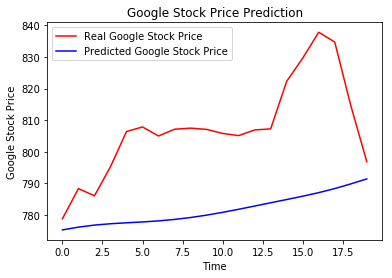

In [23]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()